In [72]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# <font color="steelblue">Principal Component Analysis

In [4]:
breast_data = load_breast_cancer()
print("Dataset shape:", breast_data.data.shape)

Dataset shape: (569, 30)


In [6]:
df_breast = pd.DataFrame(breast_data.data, columns=breast_data.feature_names)
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
df_target = pd.DataFrame(breast_data.target.reshape(-1, 1), columns=["target"])
df_target["label_name"] = df_target.replace({0: "Benign", 1: "Malignant"})
df_target

,target,label_name
0,0,Benign
1,0,Benign
2,0,Benign
3,0,Benign
4,0,Benign
...,...,...
564,0,Benign
565,0,Benign
566,0,Benign
567,0,Benign


In [24]:
df_breast = pd.concat([df_breast, df_target], axis=1)
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,label_name,target,label_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,Benign,0,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,Benign,0,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,Benign,0,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,Benign,0,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,Benign,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,Benign,0,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,Benign,0,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,Benign,0,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,Benign,0,Benign


In [25]:
scaler = StandardScaler()
scaled_breast = scaler.fit_transform(df_breast[breast_data.feature_names].values)
print("Scaled data shape:", scaled_breast.shape)
print(scaled_breast[:3])


Scaled data shape: (569, 30)
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388966

In [26]:
new_features_name = ["scaled_" + "_".join(feature.split(" ")) for feature in breast_data.feature_names]
scaled_df_breast = pd.DataFrame(scaled_breast, columns=new_features_name)
scaled_df_breast

,scaled_mean_radius,scaled_mean_texture,scaled_mean_perimeter,scaled_mean_area,scaled_mean_smoothness,scaled_mean_compactness,scaled_mean_concavity,scaled_mean_concave_points,scaled_mean_symmetry,scaled_mean_fractal_dimension,...,scaled_worst_radius,scaled_worst_texture,scaled_worst_perimeter,scaled_worst_area,scaled_worst_smoothness,scaled_worst_compactness,scaled_worst_concavity,scaled_worst_concave_points,scaled_worst_symmetry,scaled_worst_fractal_dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [27]:
pca = PCA(n_components=2)
pc_breast = pca.fit_transform(scaled_df_breast)
pc_df_breast = pd.DataFrame(pc_breast, columns=["pc1", "pc2"])
pc_df_breast

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [28]:
print("Explained variance ration:", pca.explained_variance_ratio_)

Explained variance ration: [0.44272026 0.18971182]


ValueError: Cannot index with multidimensional key

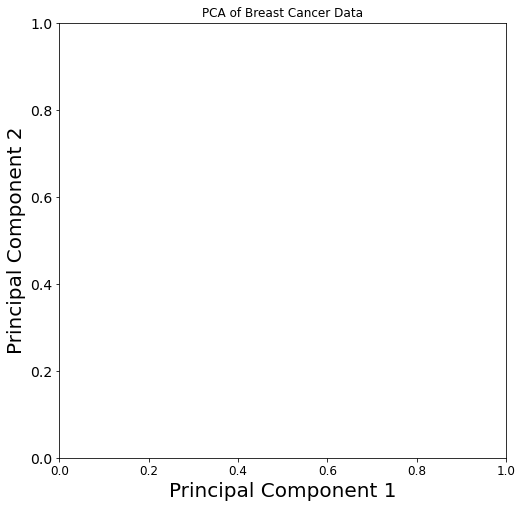

In [36]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA of Breast Cancer Data")
target_color = [("Benign", "IndianRed"), ("Malignant", "Turquoise")]
for target, color in target_color:
    list_idx = df_breast["label_name"] == target
    plt.scatter(
        pc_df_breast.loc[list_idx, "pc1"], pc_df_breast.loc[list_idx, "pc2"],
        c=color, s=50
    )
plt.legend(["Benign", "Malignant"], prop={"size": 15})
plt.show()

In [33]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398407,-0.157113,-0.877396
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013357,0.240991,-0.711903,1.106986
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097370,0.024066,0.454288
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059559,-1.405440,-1.116953
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636376,-0.263807,0.377706
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596128,-0.035475,0.987922,0.256997
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113359,-0.105209,-0.108635
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759,0.341890,0.393918,0.520867
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223083,-0.280244,-0.542036,-0.089277


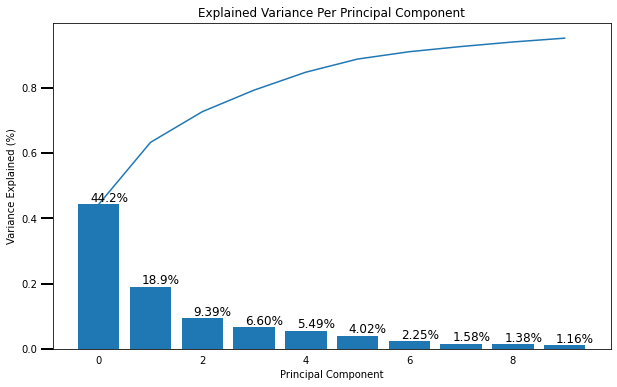

In [35]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(scaled_df_breast)
df_pca = pd.DataFrame(
    df_pca,
    columns=[
        "pc" + str(i)
    for i in range(1, pca.n_components+1)
    ]
)
display(df_pca)
scree_plot(pca)

# <font color="steelblue">K-Means Clustering

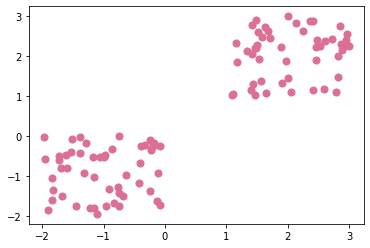

In [41]:
x = -2 * np.random.rand(100, 2)
x1 = 1 + 2 * np.random.rand(50, 2)
x[50:100, :] = x1

plt.scatter(x[:, 0], x[:, 1], s=50, c="PaleVioletRed")
plt.show()

training...
Done training


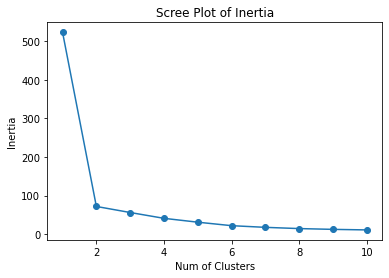

In [43]:
inertia = []

print("training...")
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
print("Done training")
    
plt.plot(range(1, 11), inertia, "o-")
plt.title("Scree Plot of Inertia")
plt.ylabel("Inertia")
plt.xlabel("Num of Clusters")
plt.show()

<font color="IndianRed"> Notes: the best k is 2 because there is a significant decrease of inertia from 1 to 2

In [44]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(x)

print("Inertia:", kmeans.inertia_)
print("Centroid:", kmeans.cluster_centers_)

Inertia: 71.92503055233043
Centroid: [[ 2.03487658  2.0556537 ]
 [-1.02007643 -0.89564806]]


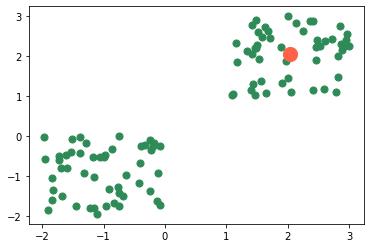

In [47]:
plt.scatter(x[:, 0], x[:, 1], s=50, c="seagreen")
#cluster's centroid
plt.scatter(
    kmeans.cluster_centers_[0, 0],
    kmeans.cluster_centers_[0, 1],
    s=200, c="tomato", marker="o"
)

plt.show()

In [49]:
df = pd.read_csv("data/customer.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [50]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Done training


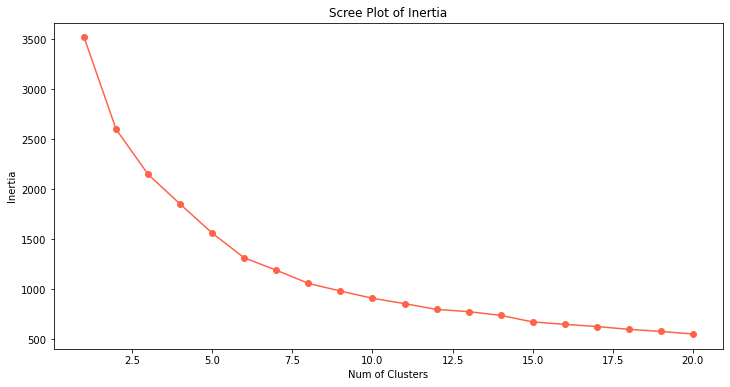

In [60]:
# standardize data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(df)

inertia = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_x)
    inertia.append(kmeans.inertia_)
print("Done training")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), inertia, "o-", c="tomato")
plt.title("Scree Plot of Inertia")
plt.ylabel("Inertia")
plt.xlabel("Num of Clusters")
plt.show()

In [58]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_x)

print("Inertia:", kmeans.inertia_)
print("Centroid:", kmeans.cluster_centers_)

Inertia: 1313.9619874240173
Centroid: [[ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]
 [-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]]


In [59]:
kmeans.labels_.shape

(440,)

In [61]:
df["cluster"] = kmeans.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,10
1,2,3,7057,9810,9568,1762,3293,1776,10
2,2,3,6353,8808,7684,2405,3516,7844,10
3,1,3,13265,1196,4221,6404,507,1788,19
4,2,3,22615,5410,7198,3915,1777,5185,10
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,18
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,5


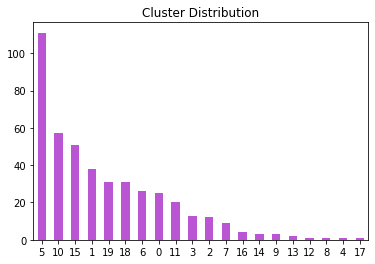

In [64]:
df.cluster.value_counts().plot(kind="bar", color="MediumOrchid")
plt.title("Cluster Distribution")
plt.xticks(rotation=0)
plt.show()

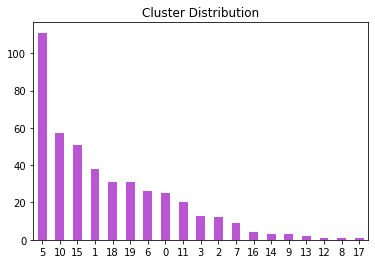

In [67]:
df = df[df.cluster != 4]

df.cluster.value_counts().plot(kind="bar", color="MediumOrchid")
plt.title("Cluster Distribution")
plt.xticks(rotation=0)
plt.show()

In [70]:
df_cluster_1 = df[df.cluster == 1]
df_cluster_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
9,2,3,6006,11093,18881,1159,7425,2098,1
16,2,3,1020,8816,12121,134,4508,1080,1
38,2,3,4591,15729,16709,33,6956,433,1
42,2,3,10850,7555,14961,188,6899,46,1
43,2,3,630,11095,23998,787,9529,72,1


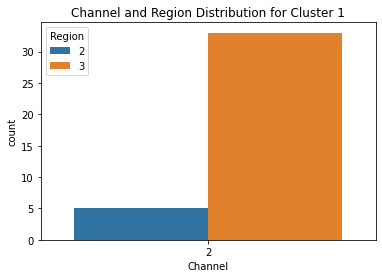

In [74]:
sns.countplot(data=df_cluster_1, x="Channel", hue="Region")
plt.title("Channel and Region Distribution for Cluster 1")
plt.show()

In [75]:
df_cluster_7 = df[df.cluster == 7]
df_cluster_7.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
39,1,3,56159,555,902,10002,212,2916,7
103,1,3,56082,3504,8906,18028,1480,2498,7
125,1,3,76237,3473,7102,16538,778,918,7
176,1,3,45640,6958,6536,7368,1532,230,7
239,1,1,47493,2567,3779,5243,828,2253,7


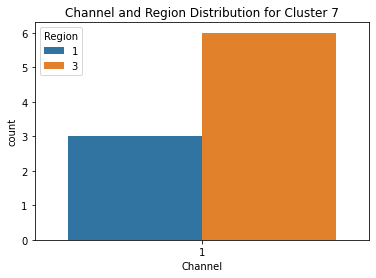

In [76]:
sns.countplot(data=df_cluster_7, x="Channel", hue="Region")
plt.title("Channel and Region Distribution for Cluster 7")
plt.show()